In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from PIL import Image

In [10]:
tf.test.gpu_device_name()

'/device:GPU:0'

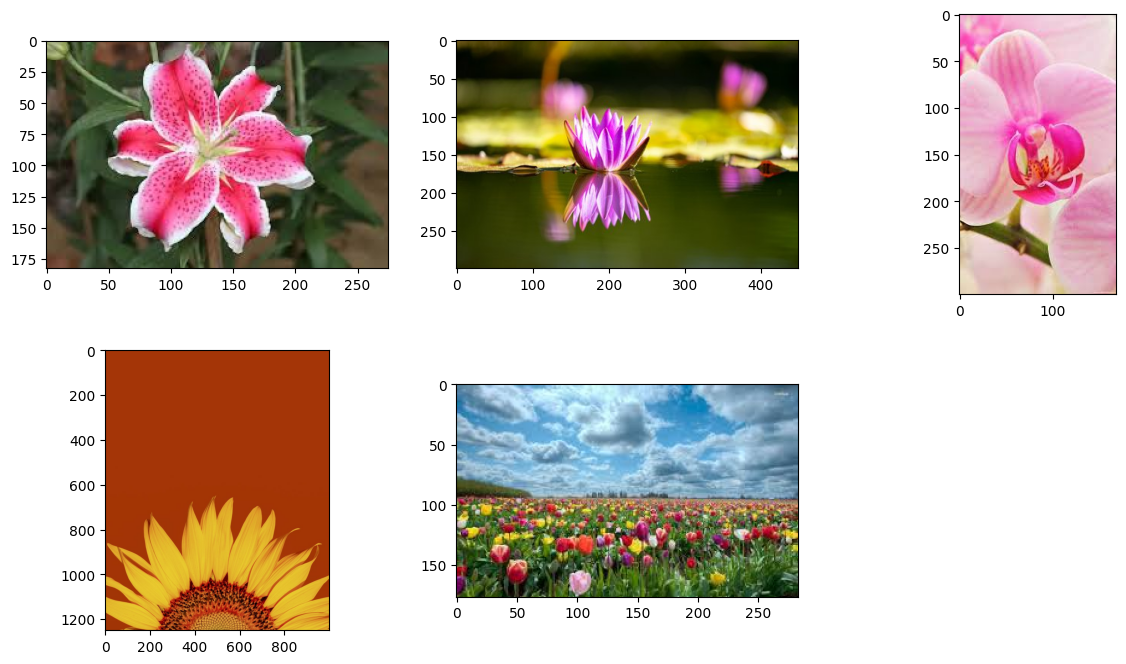

In [11]:
sample_lilly = Image.open('/kaggle/input/5-flower-types-classification-dataset/flower_images/Lilly/00f36a3c40.jpg')
sample_lotus = Image.open('/kaggle/input/5-flower-types-classification-dataset/flower_images/Lotus/0296b1fcff.jpg')
sample_orchid = Image.open('/kaggle/input/5-flower-types-classification-dataset/flower_images/Orchid/026a1d96d2.jpg')
sample_sunflower = Image.open('/kaggle/input/5-flower-types-classification-dataset/flower_images/Sunflower/01b73b8930.jpg')
sample_tulip = Image.open('/kaggle/input/5-flower-types-classification-dataset/flower_images/Tulip/04490dac82.jpg')

plt.figure(figsize=(15,8))
for i, sample in enumerate([sample_lilly,sample_lotus,sample_orchid,sample_sunflower,sample_tulip]):
    plt.subplot(2,3,i+1)
    plt.imshow(sample)

In [12]:
image_width = 256
image_height = 256

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2 
)

dataset_path = '/kaggle/input/5-flower-types-classification-dataset/flower_images/'
train_dataset = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_dataset = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [14]:
with tf.device('/GPU:0'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
125/125 [==============================] - 21s 155ms/step - loss: 1.3105 - accuracy: 0.4952 - val_loss: 1.0601 - val_accuracy: 0.5650
Epoch 2/10
125/125 [==============================] - 20s 159ms/step - loss: 0.9108 - accuracy: 0.6510 - val_loss: 0.8680 - val_accuracy: 0.6730
Epoch 3/10
125/125 [==============================] - 20s 159ms/step - loss: 0.5866 - accuracy: 0.7865 - val_loss: 0.6647 - val_accuracy: 0.7670
Epoch 4/10
125/125 [==============================] - 19s 153ms/step - loss: 0.2984 - accuracy: 0.9000 - val_loss: 0.7905 - val_accuracy: 0.7960
Epoch 5/10
125/125 [==============================] - 20s 157ms/step - loss: 0.1534 - accuracy: 0.9570 - val_loss: 0.7659 - val_accuracy: 0.8210
Epoch 6/10
125/125 [==============================] - 20s 156ms/step - loss: 0.0879 - accuracy: 0.9740 - val_loss: 0.9529 - val_accuracy: 0.8010
Epoch 7/10
125/125 [==============================] - 20s 158ms/step - loss: 0.0697 - accuracy: 0.9827 - val_loss: 1.1619 - val_ac

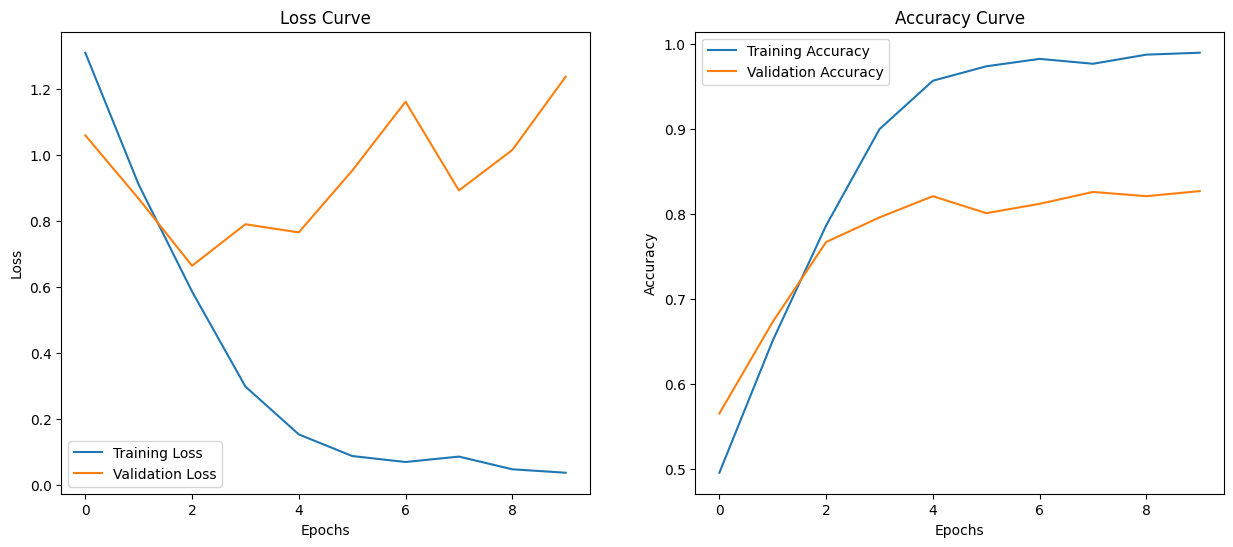

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()